# Project Name: Entity-Level Sentiment Analysis

# Requirements

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Reading dataset and initial preprocessing

In [4]:
# Define column names
columns = ["Tweet_ID", "Borderlands", "Sentiment", "Tweet_Content"]

# Read CSV file into DataFrame
path1 = r"G:\DATA SCIENCE-25\Github\entity_senti_git\dataset\twitter_training.csv"
df1 = pd.read_csv(path1, names=columns)  # Assuming the CSV file doesn't have a header row

# Display DataFrame
df1.head()

,Tweet_ID,Borderlands,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
df1.isnull().sum()

Tweet_ID           0
Borderlands        0
Sentiment          0
Tweet_Content    686
dtype: int64

In [6]:
# drop null values
df1.dropna(inplace=True)

In [7]:
df1.duplicated().sum()

2340

In [8]:
# drop duplicates keep with first 
df1.drop_duplicates(keep='first', inplace = True)

In [9]:
# Define column names
columns = ["Tweet_ID", "Borderlands", "Sentiment", "Tweet_Content"]

path2 = r"G:\DATA SCIENCE-25\Github\entity_senti_git\dataset\twitter_validation.csv"
df2 = pd.read_csv(path2, names=columns)
df2.head()

,Tweet_ID,Borderlands,Sentiment,Tweet_Content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [10]:
df2.isnull().sum()

Tweet_ID         0
Borderlands      0
Sentiment        0
Tweet_Content    0
dtype: int64

In [11]:
df2.duplicated().sum()

0

In [12]:
df1.shape

(71656, 4)

In [13]:
df2.shape

(1000, 4)

In [14]:
# Concatenate the dataframes
df = pd.concat([df1, df2])

In [15]:
df['Borderlands'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [16]:
df.shape

(72656, 4)

In [17]:
df.isnull().sum()

Tweet_ID         0
Borderlands      0
Sentiment        0
Tweet_Content    0
dtype: int64

In [18]:
df['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

**Remark** 
Firstly, it's crucial to acknowledge that the dataset is noisy, with four labels, and unbalanced. It's imperative to analyze both positive and negative aspects thoroughly. Moreover, strive to balance the dataset. YouTubers need to grasp these nuances and adapt their content strategy to elicit positive responses. Eliminate any irrelevant or neutral elements.

In [19]:
#drop irrevalent data
indices_to_drop = df[(df['Sentiment'] == 'Irrelevant') | (df['Sentiment'] == 'Neutral')].index

# Drop the rows with the obtained indices
df.drop(indices_to_drop, inplace=True)

<Axes: title={'center': 'Words_Per_Tweet'}, xlabel='Sentiment'>

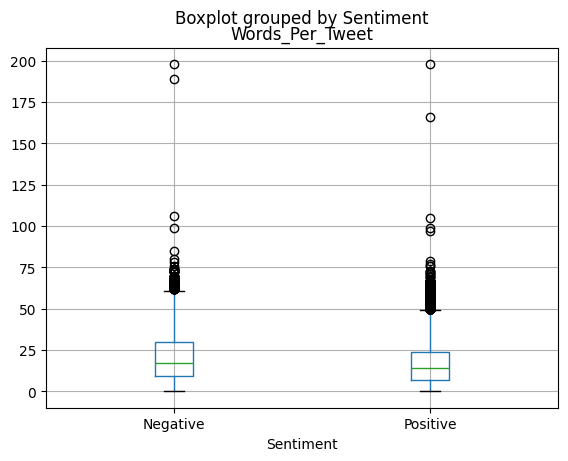

In [20]:
# define outliers
df['Words_Per_Tweet'] = df['Tweet_Content'].str.split().apply(len)
df.boxplot('Words_Per_Tweet', by='Sentiment')

Sentiment
Negative    21777
Positive    19702
Name: count, dtype: int64


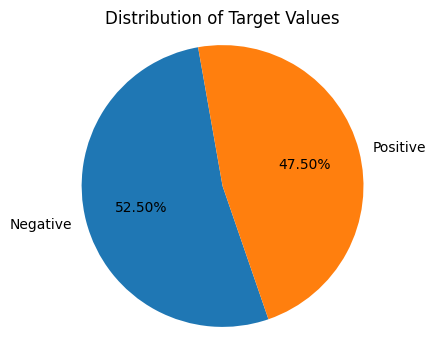

In [21]:
value_count = df['Sentiment'].value_counts()
print(value_count)

# Create a pie plot using Seaborn
plt.figure(figsize=(4, 4))

# Plot the pie chart
plt.pie(value_count, labels=value_count.index, autopct='%1.2f%%', startangle=100)
plt.title('Distribution of Target Values')
plt.axis('equal')

# Show the plot
plt.show()

**Remarks** Now, the dataset's target features are no longer overfit.

In [22]:
df.to_csv(r"G:\DATA SCIENCE-25\Github\entity_senti_git\dataset\preprocess.csv", index=False)